# KNN on Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import neighbors

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
list(dataset.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# removing name, ticket, cabin and passengerId
dataset = dataset.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)

In [7]:
dataset.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
# converting embarked, sex  to integer vals
le = preprocessing.LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex'])
dataset['Embarked'] = le.fit_transform(dataset['Embarked'])

In [9]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [10]:
# dividing in dependent and independent variables
X = dataset.drop(["Pclass"], axis=1)
y = dataset['Pclass']

In [11]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
# Training model
testSize = X_test['Survived'].count()
K_list = np.arange(1,testSize+1)
score = []
conf_mat = []
for i in K_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score.append(round(knn.score(X_test, y_test) * 100, 2))
    y_pred = knn.predict(X_test)
    conf_mat.append(confusion_matrix(y_test, y_pred))

In [13]:
df_K_and_score = pd.DataFrame(list(zip(K_list, score, conf_mat)), columns=['K', 'Score', 'Confusion Matrix'])

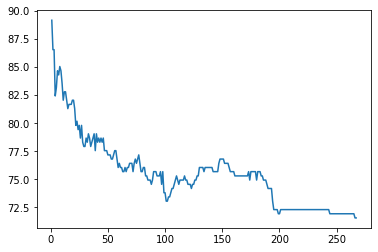

In [14]:
plt.plot(K_list, score)

In [15]:
print("Best K :", df_K_and_score['K'][df_K_and_score['Score'].argmax()])
print("Accuracy :", df_K_and_score['Score'][df_K_and_score['Score'].argmax()])
print("Confusion Matrix :\n", df_K_and_score['Confusion Matrix'][df_K_and_score['Score'].argmax()])

Best K : 1
Accuracy : 89.14
Confusion Matrix :
 [[ 62   6   2]
 [  3  37   9]
 [  1   8 139]]
